# Capstone Project - The Battle of the Neighborhoods (Week 2)

## Introduction: Business Problem

### In this project, I will try to find some better communities around University of Toronto (St. George Campus).

### This report will be targeted to stakeholders interested in working or studying in University of Toronto and find a safe (low crime rate), convenient (with lot of grocery stores and restaurants) and near community to live.



## Data

### Use Calgary Police data to get crime data, and simply get the latitude and longitude for each community

In [1]:
!pip install mpu
!pip install folium==0.5.0


     |████████████████████████████████| 69 kB 9.1 MB/s  eta 0:00:01
     |████████████████████████████████| 79 kB 8.4 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=582c07b9bf5ea8c7923ed0544afb144b2232b58c3a8759ad71ba79db3831e388
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium


In [2]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import mpu
import folium # plotting library

## Read Police data Crime data.

### Remove a lot of un-needed columns

In [3]:
#Read MCI (Major Crime Indicators) from Toronto Police's public safety data portal
dfCrime = pd.read_csv("https://opendata.arcgis.com/datasets/56a0d46ae5f141269f2598a8c07e25c1_0.csv?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D")
##drop the column we don't need
dfCrime = dfCrime.drop(['X', 'Y', 'Index_', 'event_unique_id', 'ucr_code', 'ucr_ext', 'occurrencedayofyear', 'ObjectId'], axis=1)
dfCrime = dfCrime.drop(['reporteddate', 'reportedyear', 'reportedmonth', 'reportedday', 'reporteddayofyear', 'reporteddayofweek', 'reportedhour'], axis=1)
#remove Hood_ID from Neighbourhood column
dfCrime['Neighbourhood'] = dfCrime['Neighbourhood'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()

In [4]:
dfCrime

,occurrencedate,premisetype,offence,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long
0,2014/01/07 05:00:00+00,Other,Assault With Weapon,2014.0,January,7.0,Tuesday,22,Assault,D32,36,Newtonbrook West,43.781639,-79.416
1,2014/01/07 05:00:00+00,Other,Assault With Weapon,2014.0,January,7.0,Tuesday,22,Assault,D32,36,Newtonbrook West,43.781639,-79.416
2,2014/01/07 05:00:00+00,Other,Assault With Weapon,2014.0,January,7.0,Tuesday,22,Assault,D32,36,Newtonbrook West,43.781639,-79.416
3,2014/01/07 05:00:00+00,Other,Assault With Weapon,2014.0,January,7.0,Tuesday,22,Assault,D32,36,Newtonbrook West,43.781639,-79.416
4,2014/01/07 05:00:00+00,Commercial,B&E,2014.0,January,7.0,Tuesday,21,Break and Enter,D14,79,University,43.665390,-79.410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206430,2019/08/13 04:00:00+00,Outside,Theft Of Motor Vehicle,2019.0,August,13.0,Tuesday,17,Auto Theft,D31,21,Humber Summit,43.750652,-79.549
206431,2019/08/13 04:00:00+00,Commercial,Theft Of Motor Vehicle,2019.0,August,13.0,Tuesday,14,Auto Theft,D12,111,Rockcliffe,43.683521,-79.481
206432,2019/08/13 04:00:00+00,Outside,Theft Of Motor Vehicle,2019.0,August,13.0,Tuesday,13,Auto Theft,D31,21,Humber Summit,43.758480,-79.571
206433,2019/08/13 04:00:00+00,Outside,Theft Of Motor Vehicle,2019.0,August,13.0,Tuesday,11,Auto Theft,D12,111,Rockcliffe,43.675377,-79.506


## group by to get the total number of crime cases for each community

In [5]:
#neighbourhood Crime Summary 
dfCommunity = pd.DataFrame(dfCrime.groupby(['Neighbourhood']).size().reset_index(name = "CrimeNum"))

dfCommunity

,Neighbourhood,CrimeNum
0,Agincourt North,1157
1,Agincourt South,1650
2,Alderwood,545
3,Annex,2917
4,Banbury,1205
...,...,...
133,Woodbine Corridor,877
134,Wychwood,801
135,Yonge,1235
136,York University Heights,3989


## To make things simple, take the average of latitude and longitude of all crime places and use them as the lat/long of the community

In [6]:
#average of lat and long per neighbourhood
dfNeighbourhoodLatLong = pd.DataFrame(dfCrime.groupby(['Neighbourhood']).agg({'Lat': ['mean'], 'Long': ['mean']}))

dfNeighbourhoodLatLong.columns = ['Latitude','Longitude']
dfNeighbourhoodLatLong.reset_index()
dfNeighbourhoodLatLong

,Latitude,Longitude
Neighbourhood,,
Agincourt North,43.807289,-79.270264
Agincourt South,43.788143,-79.266564
Alderwood,43.605287,-79.542018
Annex,43.670536,-79.401894
Banbury,43.735696,-79.346293
...,...,...
Woodbine Corridor,43.677091,-79.315852
Wychwood,43.678668,-79.425900
Yonge,43.699744,-79.399440


## merge DataFrames to get total number of crime cases and latitude/longitude

In [7]:
#merge the latitude/Longitude with CrimeSummary
dfCommunity = dfCommunity.merge(dfNeighbourhoodLatLong,on='Neighbourhood',how="inner")
dfCommunity


,Neighbourhood,CrimeNum,Latitude,Longitude
0,Agincourt North,1157,43.807289,-79.270264
1,Agincourt South,1650,43.788143,-79.266564
2,Alderwood,545,43.605287,-79.542018
3,Annex,2917,43.670536,-79.401894
4,Banbury,1205,43.735696,-79.346293
...,...,...,...,...
133,Woodbine Corridor,877,43.677091,-79.315852
134,Wychwood,801,43.678668,-79.425900
135,Yonge,1235,43.699744,-79.399440
136,York University Heights,3989,43.763848,-79.489756


## Google and get the latitude/longitude for St. George Campus of University of Torobto

In [8]:
#Get university of toronto latitude and longitude
LatitudeUT = 43.6629
LongitideUT = -79.3957


## Call mpu (Martins Python Utilities) to calculate the Haversine distance

In [9]:
#Create a new column: Distance to University of Toronto
dfCommunity['Dist2UT'] = 0.0
#Calculate the distance from each community to University of Toronto
for index, row in dfCommunity.iterrows():
    distRow = mpu.haversine_distance((row['Latitude'], row['Longitude']), (LatitudeUT, LongitideUT))
    dfCommunity.at[index,'Dist2UT'] = distRow
dfCommunity

,Neighbourhood,CrimeNum,Latitude,Longitude,Dist2UT
0,Agincourt North,1157,43.807289,-79.270264,18.956251
1,Agincourt South,1650,43.788143,-79.266564,17.367292
2,Alderwood,545,43.605287,-79.542018,13.405333
3,Annex,2917,43.670536,-79.401894,0.984465
4,Banbury,1205,43.735696,-79.346293,9.016547
...,...,...,...,...,...
133,Woodbine Corridor,877,43.677091,-79.315852,6.613243
134,Wychwood,801,43.678668,-79.425900,2.995660
135,Yonge,1235,43.699744,-79.399440,4.107916
136,York University Heights,3989,43.763848,-79.489756,13.533116


## Prepare to call FourSquare API to get the number of grocery stores and restaurants for each community

In [10]:
#Python code to call FourSquare API
import requests # library to handle requests

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
##from pandas.io.json import json_normalize
from pandas import json_normalize

import folium # plotting library

#Define Foursquare Credentials and Version
CLIENT_ID = 'B2ZH2JO3RL4G5LRC3OGRI53GM4OFDNMK42Y1UCASPLRPRIJD' # your Foursquare ID
CLIENT_SECRET = 'SHRAIHQ3E1DGLRND5IXDWPDEC1NQE0QXWABLK4YBWI2IJRD2' # your Foursquare Secret
VERSION = '20201124'
LIMIT = 50

#Create a new column: Number of Grocery Stores within 2 km
#Create a new column: Number of Restaurant within 2 km
dfCommunity['NumGrocery'] = 0
dfCommunity['NumRestaurant'] = 0
dfCommunity

,Neighbourhood,CrimeNum,Latitude,Longitude,Dist2UT,NumGrocery,NumRestaurant
0,Agincourt North,1157,43.807289,-79.270264,18.956251,0,0
1,Agincourt South,1650,43.788143,-79.266564,17.367292,0,0
2,Alderwood,545,43.605287,-79.542018,13.405333,0,0
3,Annex,2917,43.670536,-79.401894,0.984465,0,0
4,Banbury,1205,43.735696,-79.346293,9.016547,0,0
...,...,...,...,...,...,...,...
133,Woodbine Corridor,877,43.677091,-79.315852,6.613243,0,0
134,Wychwood,801,43.678668,-79.425900,2.995660,0,0
135,Yonge,1235,43.699744,-79.399440,4.107916,0,0
136,York University Heights,3989,43.763848,-79.489756,13.533116,0,0


### get number of grocery stores within 2 km for each community

In [11]:
#Search a specific venue 
#https://api.foursquare.com/v2/venues/search?client_id=CLIENT_ID&client_secret=CLIENT_SECRET&ll=LATITUDE,LONGITUDE&v=VERSION&query=QUERY&radius=RADIUS&limit=LIMIT
#example, search Italian food
search_query = 'Grocery Store'
radius = 2000   #unit meters 2km

for index, row in dfCommunity.iterrows():
    CommuLat=row['Latitude']
    CommuLong=row['Longitude']
    
    #define URL
    urlGrocery = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, CommuLat, CommuLong, VERSION, search_query, radius, LIMIT)
    #url

    #Send the GET Request and get results
    resultGrocery = requests.get(urlGrocery).json()
    #resultGrocery
    
    #Convert JSON to pandas dataframe
    # assign relevant part of JSON to venues
    venueGrocery = resultGrocery['response']['venues']

    # tranform venues into a dataframe
    dfGrocery = json_normalize(venueGrocery)
    
    dfCommunity.at[index,'NumGrocery'] = len(dfGrocery.index)
dfCommunity



,Neighbourhood,CrimeNum,Latitude,Longitude,Dist2UT,NumGrocery,NumRestaurant
0,Agincourt North,1157,43.807289,-79.270264,18.956251,11,0
1,Agincourt South,1650,43.788143,-79.266564,17.367292,21,0
2,Alderwood,545,43.605287,-79.542018,13.405333,24,0
3,Annex,2917,43.670536,-79.401894,0.984465,50,0
4,Banbury,1205,43.735696,-79.346293,9.016547,15,0
...,...,...,...,...,...,...,...
133,Woodbine Corridor,877,43.677091,-79.315852,6.613243,42,0
134,Wychwood,801,43.678668,-79.425900,2.995660,50,0
135,Yonge,1235,43.699744,-79.399440,4.107916,43,0
136,York University Heights,3989,43.763848,-79.489756,13.533116,13,0


### get number of restaurants within 2 km for each community

In [12]:
#Search a specific venue 
#https://api.foursquare.com/v2/venues/search?client_id=CLIENT_ID&client_secret=CLIENT_SECRET&ll=LATITUDE,LONGITUDE&v=VERSION&query=QUERY&radius=RADIUS&limit=LIMIT
#example, search Italian food
search_query = 'Restaurant'
radius = 2000   #unit meters 2km

for index, row in dfCommunity.iterrows():
    CommuLat=row['Latitude']
    CommuLong=row['Longitude']
    
    #define URL
    urlRestaurant = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, CommuLat, CommuLong, VERSION, search_query, radius, LIMIT)
    #urlRestaurant

    #Send the GET Request and get results
    resultRestaurant = requests.get(urlRestaurant).json()
    #resultRestaurant
    
    #Convert JSON to pandas dataframe
    # assign relevant part of JSON to venues
    venueRestaurant = resultRestaurant['response']['venues']

    # tranform venues into a dataframe
    dfRestaurant = json_normalize(venueRestaurant)
    
    dfCommunity.at[index,'NumRestaurant'] = len(dfRestaurant.index)
dfCommunity

,Neighbourhood,CrimeNum,Latitude,Longitude,Dist2UT,NumGrocery,NumRestaurant
0,Agincourt North,1157,43.807289,-79.270264,18.956251,11,50
1,Agincourt South,1650,43.788143,-79.266564,17.367292,21,50
2,Alderwood,545,43.605287,-79.542018,13.405333,24,10
3,Annex,2917,43.670536,-79.401894,0.984465,50,50
4,Banbury,1205,43.735696,-79.346293,9.016547,15,14
...,...,...,...,...,...,...,...
133,Woodbine Corridor,877,43.677091,-79.315852,6.613243,42,48
134,Wychwood,801,43.678668,-79.425900,2.995660,50,50
135,Yonge,1235,43.699744,-79.399440,4.107916,43,45
136,York University Heights,3989,43.763848,-79.489756,13.533116,13,23


## sort to get safest communities (with lowest crime cases)

In [13]:
dfSafestCommunity = dfCommunity.sort_values('CrimeNum')
dfSafestCommunity.head(n=20)

,Neighbourhood,CrimeNum,Latitude,Longitude,Dist2UT,NumGrocery,NumRestaurant
66,Lambton Baby Point,353,43.659599,-79.495700,8.052567,11,17
132,Woodbine,377,43.694349,-79.312822,7.526616,26,42
74,Maple Leaf,410,43.714170,-79.480868,8.910484,16,21
47,Guildwood,411,43.748949,-79.198910,18.487106,8,9
75,Markland Wood,413,43.634146,-79.573649,14.670296,19,13
93,Old East York,479,43.694463,-79.337367,5.858653,28,50
21,Casa Loma,480,43.681806,-79.410546,2.417683,50,50
44,Forest Hill South,494,43.693269,-79.415660,3.738935,40,43
64,Kingsway South,496,43.652180,-79.510917,9.345248,9,18
22,Centennial Scarborough,508,43.782822,-79.150116,23.817767,3,1


## sort to get nearest communities to UT

In [14]:
dfNearestCommunity = dfCommunity.sort_values('Dist2UT')
dfNearestCommunity.head(n=20)

,Neighbourhood,CrimeNum,Latitude,Longitude,Dist2UT,NumGrocery,NumRestaurant
120,University,1455,43.662725,-79.403578,0.634008,50,50
3,Annex,2917,43.670536,-79.401894,0.984465,50,50
62,Kensington,3823,43.653543,-79.397943,1.055995,50,50
6,Bay Street Corridor,6817,43.657107,-79.383593,1.167672,50,50
23,Church,6232,43.659558,-79.379585,1.348559,50,50
89,North St,1721,43.669220,-79.374539,1.841466,50,50
94,Palmerston,1053,43.660046,-79.418594,1.868826,50,50
104,Rosedale,1276,43.678897,-79.384606,1.990088,50,50
119,Trinity,1572,43.650747,-79.414001,1.998425,50,50
19,Cabbagetown,1223,43.665410,-79.370433,2.051539,50,50


## Extract features for DecisionTree maching learning model

In [15]:
dfDTCommunity = dfCommunity[["CrimeNum", "Dist2UT", "NumGrocery", "NumRestaurant"]]
dfDTCommunity

#Add a new column
dfDTCommunity.insert(4, 'SelCommunity', 'No')
dfDTCommunity

,CrimeNum,Dist2UT,NumGrocery,NumRestaurant,SelCommunity
0,1157,18.956251,11,50,No
1,1650,17.367292,21,50,No
2,545,13.405333,24,10,No
3,2917,0.984465,50,50,No
4,1205,9.016547,15,14,No
...,...,...,...,...,...
133,877,6.613243,42,48,No
134,801,2.995660,50,50,No
135,1235,4.107916,43,45,No
136,3989,13.533116,13,23,No


In [16]:
#Choose Community
#   Distance to University of Toronto less than 5
#   Crime Number < 730 (one crime per 3 days)
#   More than 35 groceries and restaurat

for index, row in dfDTCommunity.iterrows():
    CommuDistane=row['Dist2UT']
    CommuCrimeNum=row['CrimeNum']
    CommuGrocery=row['NumGrocery']
    CommuRestaurant=row['NumRestaurant']
    
    #check condition
    if (CommuDistane < 5) & (CommuCrimeNum < 730) & (CommuGrocery > 35) & (CommuRestaurant > 35) :
        dfDTCommunity.at[index,'SelCommunity'] = 'Yes'

dfDTCommunity


,CrimeNum,Dist2UT,NumGrocery,NumRestaurant,SelCommunity
0,1157,18.956251,11,50,No
1,1650,17.367292,21,50,No
2,545,13.405333,24,10,No
3,2917,0.984465,50,50,No
4,1205,9.016547,15,14,No
...,...,...,...,...,...
133,877,6.613243,42,48,No
134,801,2.995660,50,50,No
135,1235,4.107916,43,45,No
136,3989,13.533116,13,23,No


## short list the communites with lowest crime cases (<730), less then 5km to UT, more than 35 grocery stores and 35 restaurants with 2km

In [17]:
dfDTCommunity[dfDTCommunity['SelCommunity'] == "Yes"]
#All communities to match critiria
dfSelect = dfCommunity[ (dfCommunity['CrimeNum'] == 679) | (dfCommunity['CrimeNum'] == 480) | (dfCommunity['CrimeNum'] == 494) | (dfCommunity['CrimeNum'] == 645) | (dfCommunity['CrimeNum'] == 707) ]
dfSelect

,Neighbourhood,CrimeNum,Latitude,Longitude,Dist2UT,NumGrocery,NumRestaurant
14,Blake,679,43.677185,-79.338324,4.880499,50,50
21,Casa Loma,480,43.681806,-79.410546,2.417683,50,50
44,Forest Hill South,494,43.693269,-79.415660,3.738935,40,43
56,Humewood,645,43.690499,-79.426161,3.926759,37,39
97,Playter Estates,707,43.678728,-79.353730,3.806924,50,50


## Set up Decision Tree Maching Learning model

In [18]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [19]:
#split dataset in features and target variable
XFeature = dfDTCommunity[['CrimeNum', 'Dist2UT', 'NumGrocery', 'NumRestaurant']].values # Features
yTarget = dfDTCommunity["SelCommunity"] # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(XFeature, yTarget, test_size=0.3) # 70% training and 30% test

# Create Decision Tree classifer object
#CommunityTree = DecisionTreeClassifier()
CommunityTree = DecisionTreeClassifier(max_features=4)


# Train Decision Tree Classifer
CommunityTree.fit(X_train, y_train)

# get importance
importance = CommunityTree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature Importance: %0d, Score: %.5f' % (i,v))
    
#Predict the response for test dataset
y_pred = CommunityTree.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Feature Importance: 0, Score: 0.62673
Feature Importance: 1, Score: 0.11521
Feature Importance: 2, Score: 0.25806
Feature Importance: 3, Score: 0.00000
Accuracy: 1.0


## Visualize the Decision Tree model

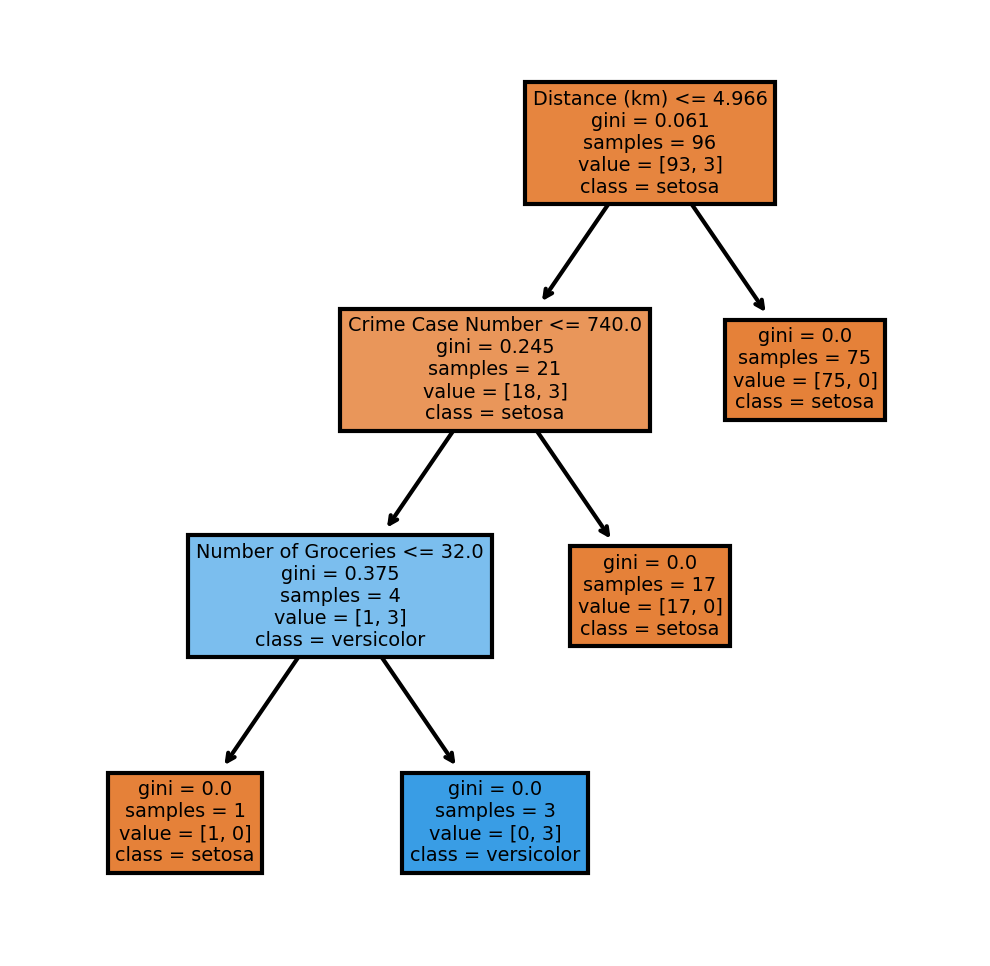

In [20]:
fn=['Crime Case Number','Distance (km)','Number of Groceries','Number of Restaurant']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(CommunityTree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('Community.png')


## Compare the short-listed 5 communities, aggregate the crime cases to month level and see the crime rate trending

In [21]:
#neighbourhood Crime Summary 
#dfCrime[dfCrime['Neighbourhood'] == "Casa Loma"]
CrimeTrend1 = pd.DataFrame(dfCrime[dfCrime['Neighbourhood'] == "Blake"].groupby(['occurrenceyear', 'occurrencemonth']).size().reset_index(name = "CrimeNum"))
CrimeTrend2 = pd.DataFrame(dfCrime[dfCrime['Neighbourhood'] == "Casa Loma"].groupby(['occurrenceyear', 'occurrencemonth']).size().reset_index(name = "CrimeNum"))
CrimeTrend3 = pd.DataFrame(dfCrime[dfCrime['Neighbourhood'] == "Forest Hill South"].groupby(['occurrenceyear', 'occurrencemonth']).size().reset_index(name = "CrimeNum"))
CrimeTrend4 = pd.DataFrame(dfCrime[dfCrime['Neighbourhood'] == "Humewood"].groupby(['occurrenceyear', 'occurrencemonth']).size().reset_index(name = "CrimeNum"))
CrimeTrend5 = pd.DataFrame(dfCrime[dfCrime['Neighbourhood'] == "Playter Estates"].groupby(['occurrenceyear', 'occurrencemonth']).size().reset_index(name = "CrimeNum"))

CrimeTrend1 = CrimeTrend1.replace({'occurrencemonth': {"January": "1", "February": "2", "March": "3", "April": "4", "May": "5","June": "6","August": "8","September": "9","October": "10","November": "11","December": "12"}})
CrimeTrend2 = CrimeTrend2.replace({'occurrencemonth': {"January": "1", "February": "2", "March": "3", "April": "4", "May": "5","June": "6","August": "8","September": "9","October": "10","November": "11","December": "12"}})
CrimeTrend3 = CrimeTrend3.replace({'occurrencemonth': {"January": "1", "February": "2", "March": "3", "April": "4", "May": "5","June": "6","August": "8","September": "9","October": "10","November": "11","December": "12"}})
CrimeTrend4 = CrimeTrend4.replace({'occurrencemonth': {"January": "1", "February": "2", "March": "3", "April": "4", "May": "5","June": "6","August": "8","September": "9","October": "10","November": "11","December": "12"}})
CrimeTrend5 = CrimeTrend5.replace({'occurrencemonth': {"January": "1", "February": "2", "March": "3", "April": "4", "May": "5","June": "6","August": "8","September": "9","October": "10","November": "11","December": "12"}})

CrimeTrend1["occurrencemonth"] = CrimeTrend1["occurrenceyear"].astype(str) + CrimeTrend1["occurrencemonth"]
CrimeTrend2["occurrencemonth"] = CrimeTrend2["occurrenceyear"].astype(str) + CrimeTrend2["occurrencemonth"]
CrimeTrend3["occurrencemonth"] = CrimeTrend3["occurrenceyear"].astype(str) + CrimeTrend3["occurrencemonth"]
CrimeTrend4["occurrencemonth"] = CrimeTrend4["occurrenceyear"].astype(str) + CrimeTrend4["occurrencemonth"]
CrimeTrend5["occurrencemonth"] = CrimeTrend5["occurrenceyear"].astype(str) + CrimeTrend5["occurrencemonth"]

CrimeTrend1['occurrencemonth'] = CrimeTrend1['occurrencemonth'].str.replace('\.010','.10')
CrimeTrend1['occurrencemonth'] = CrimeTrend1['occurrencemonth'].str.replace('\.011','.11')
CrimeTrend1['occurrencemonth'] = CrimeTrend1['occurrencemonth'].str.replace('\.012','.12')

CrimeTrend2['occurrencemonth'] = CrimeTrend2['occurrencemonth'].str.replace('\.010','.10')
CrimeTrend2['occurrencemonth'] = CrimeTrend2['occurrencemonth'].str.replace('\.011','.11')
CrimeTrend2['occurrencemonth'] = CrimeTrend2['occurrencemonth'].str.replace('\.012','.12')

CrimeTrend3['occurrencemonth'] = CrimeTrend3['occurrencemonth'].str.replace('\.010','.10')
CrimeTrend3['occurrencemonth'] = CrimeTrend3['occurrencemonth'].str.replace('\.011','.11')
CrimeTrend3['occurrencemonth'] = CrimeTrend3['occurrencemonth'].str.replace('\.012','.12')

CrimeTrend4['occurrencemonth'] = CrimeTrend4['occurrencemonth'].str.replace('\.010','.10')
CrimeTrend4['occurrencemonth'] = CrimeTrend4['occurrencemonth'].str.replace('\.011','.11')
CrimeTrend4['occurrencemonth'] = CrimeTrend4['occurrencemonth'].str.replace('\.012','.12')

CrimeTrend5['occurrencemonth'] = CrimeTrend5['occurrencemonth'].str.replace('\.010','.10')
CrimeTrend5['occurrencemonth'] = CrimeTrend5['occurrencemonth'].str.replace('\.011','.11')
CrimeTrend5['occurrencemonth'] = CrimeTrend5['occurrencemonth'].str.replace('\.012','.12')

CrimeTrend1 = CrimeTrend1.drop(['occurrenceyear'], axis=1)
CrimeTrend2 = CrimeTrend2.drop(['occurrenceyear'], axis=1)
CrimeTrend3 = CrimeTrend3.drop(['occurrenceyear'], axis=1)
CrimeTrend4 = CrimeTrend4.drop(['occurrenceyear'], axis=1)
CrimeTrend5 = CrimeTrend5.drop(['occurrenceyear'], axis=1)


## Plot the crime case numbers for those 5 communities and see the trending

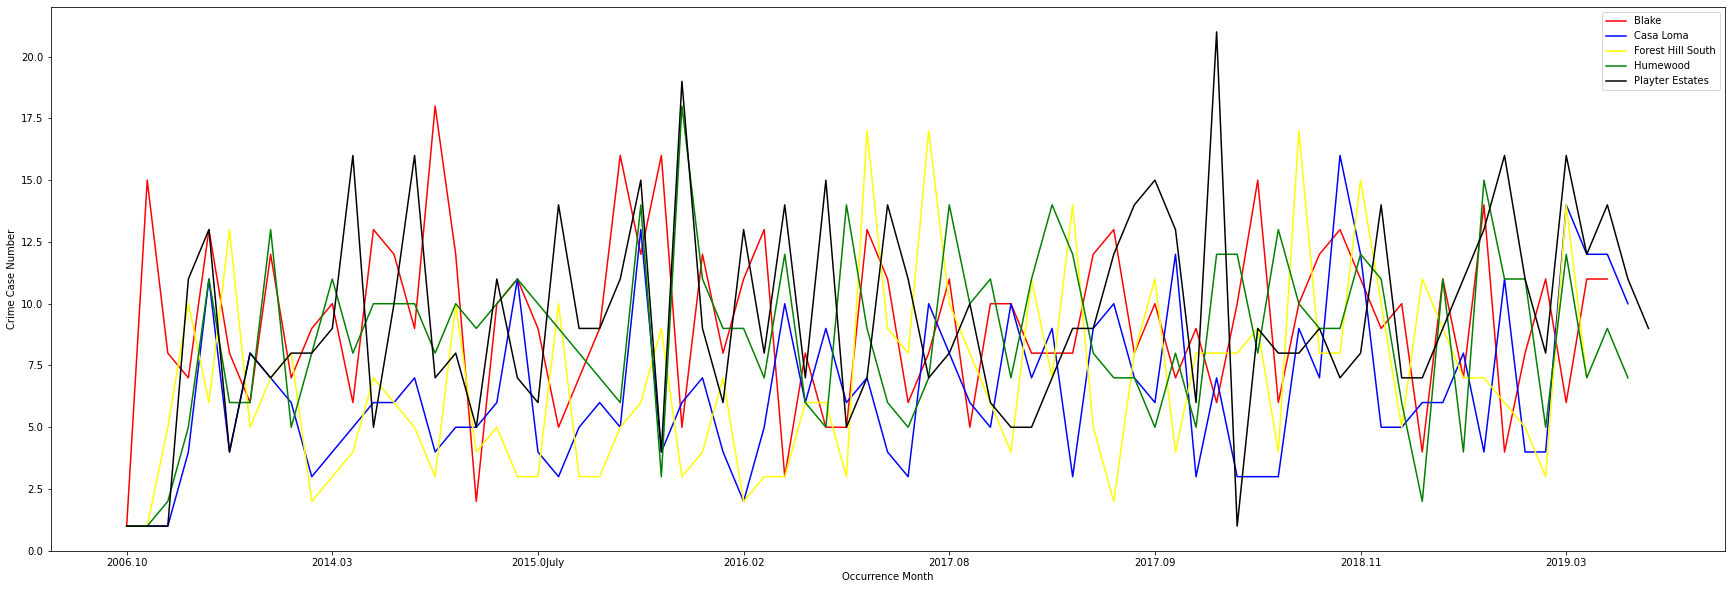

In [22]:
# gca stands for 'get current axis'
ax = plt.gca()

ax.set_ylabel("Crime Case Number")

CrimeTrend1.plot(kind='line',x='occurrencemonth',y='CrimeNum',color='red', ax=ax, figsize=(30,10), label='Blake')
CrimeTrend2.plot(kind='line',x='occurrencemonth',y='CrimeNum',color='blue', ax=ax, label='Casa Loma')
CrimeTrend3.plot(kind='line',x='occurrencemonth',y='CrimeNum',color='yellow', ax=ax, label='Forest Hill South')
CrimeTrend4.plot(kind='line',x='occurrencemonth',y='CrimeNum',color='green', ax=ax, label='Humewood')
CrimeTrend5.plot(kind='line',x='occurrencemonth',y='CrimeNum',color='black', ax=ax, label='Playter Estates')

ax.set_xlabel("Occurrence Month")
plt.show()


# plot those 5 communities on the map around UofT

In [23]:
#visualizat Manhattan the neighborhoods on map
# create map of University of Toronto using latitude and longitude values
map_UT = folium.Map(location=[LatitudeUT, LongitideUT], zoom_start=14)

label = folium.Popup("UofT", parse_html=True)
folium.CircleMarker(
    [LatitudeUT, LongitideUT],
    radius=5,
    popup=label,
    color='red',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=1.0,
    parse_html=False).add_to(map_UT)  
    
# add markers to map
for index, row in dfSelect.iterrows():

    label = folium.Popup(row['Neighbourhood'], parse_html=True)
    
    folium.CircleMarker(
        [row['Latitude'], row['Longitude']],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_UT)  
    
map_UT

In [24]:
print("Thank you")

Thank you
